# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
# Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
# Drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


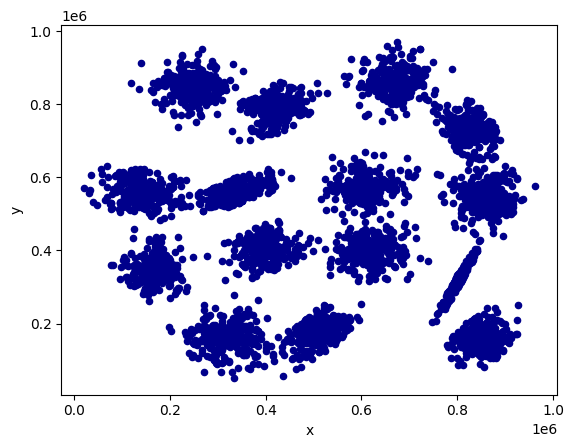

In [ ]:
# Lakukan Visualisasi
# Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from warnings import filterwarnings as fw; fw("ignore")

In [ ]:
# Mencari jumlah optimal clusters
inertia = []
# perulangan for untuk mengiterasi cluster
for k in range(10, 25):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(data)
  inertia.append(model.inertia_)

print(inertia)

[34391481278674.81, 28911073060127.125, 23146756787307.777, 18350029727191.914, 13486733767168.459, 8917615616867.258, 8654195380138.777, 8415631292726.098, 8227282809930.557, 8000004005435.432, 7782061513020.172, 7672183139126.995, 7519773294441.791, 7189455085478.642, 7006296067332.918]


In [ ]:
# Membuat dataframe
inertia_df = pd.DataFrame({'inertia':inertia}, index=[i for i in range(10, 25)])

inertia_df

,inertia
10,3.439148e+13
11,2.891107e+13
12,2.314676e+13
13,1.835003e+13
14,1.348673e+13
15,8.917616e+12
16,8.654195e+12
17,8.415631e+12
18,8.227283e+12
19,8.000004e+12


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

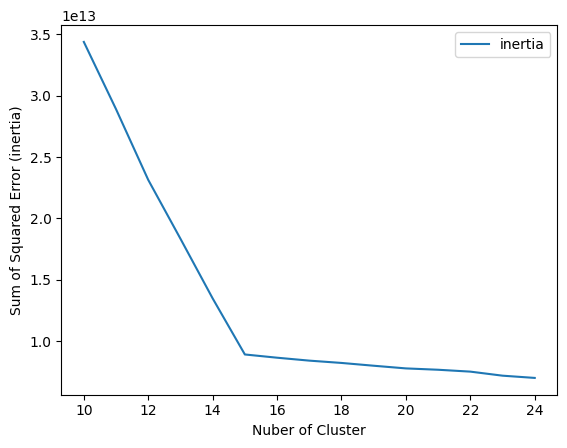

In [ ]:
# Membuat visualisasi garis dari inertia
inertia_df.plot(kind='line')
# Memberikan label
plt.ylabel('Sum of Squared Error (inertia)')
plt.xlabel('Nuber of Cluster')
plt.title

Terlihat bahwa line terjadi patahan di angka 15, sehingga cluster terbaik adalah 15 yang selanjutnya akan di evaluasi

In [ ]:
# Jumlah cluster
nc = 15

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik

#START CODE
kmeans = cluster.KMeans(n_clusters=nc, random_state=42)
kmeans.fit(data)
label = kmeans.labels_
#END CODE

score = silhouette_score(data, label)
print("silhouette score :",score)

silhouette score : 0.711278614093076


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = label
result.head()
#END CODE

,x,y,cluster
0,664159,550946,5
1,665845,557965,5
2,597173,575538,5
3,618600,551446,5
4,635690,608046,5


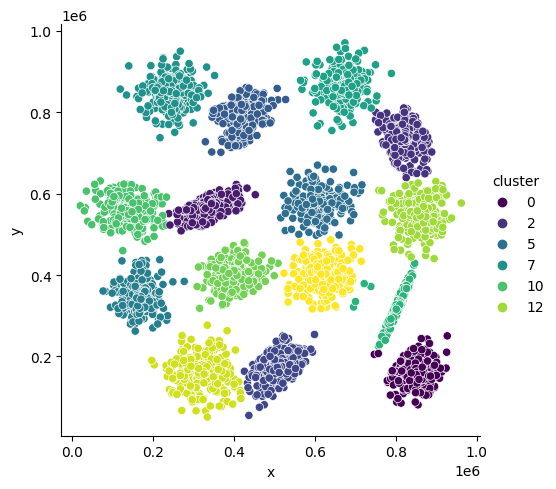

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', hue='cluster', data=result, palette='viridis' )
#END CODE